# Canadian Institute For Advanced Research: CIFAR-10 Project

## Introduction
The CIFAR-10 dataset, provided by the Canadian Institute for Advanced Research, is a staple in the machine learning community for benchmarking image classification algorithms. This dataset comprises 60,000 32x32 color images, evenly distributed across 10 distinct classes representing various objects and animals. Each class contains 6,000 images, providing a balanced dataset for robust model training and evaluation.

Classes include:
- Airplanes
- Cars
- Birds
- Cats
- Deer
- Dogs
- Frogs
- Horses
- Ships
- Trucks

The small size and low resolution of these images present a unique challenge in the field of computer vision, making CIFAR-10 an excellent testbed for developing and tuning algorithms capable of image recognition and classification.

## Objective
In this notebook, we embark on a journey to build and refine deep learning models that can accurately classify images from the CIFAR-10 dataset. Our exploration is divided into two phases:

1. **First Pass**: We start with a basic Convolutional Neural Network (CNN) model. This initial phase focuses on establishing a baseline for performance. We'll construct a simple yet effective CNN, train it on the CIFAR-10 data, and evaluate its accuracy.

2. **Second Pass**: Building upon our initial model, we'll introduce advanced techniques such as Batch Normalization, Dropout, and Callbacks for model optimization. The goal in this phase is to improve our model's performance by enhancing its architecture and training process.

Throughout this notebook, we will also explore various aspects of the data, visualize our results, and analyze the performance of our models. By comparing the two approaches, we aim to demonstrate the impact of advanced neural network techniques on model accuracy and efficiency.

Data Source: [CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

## First Pass

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

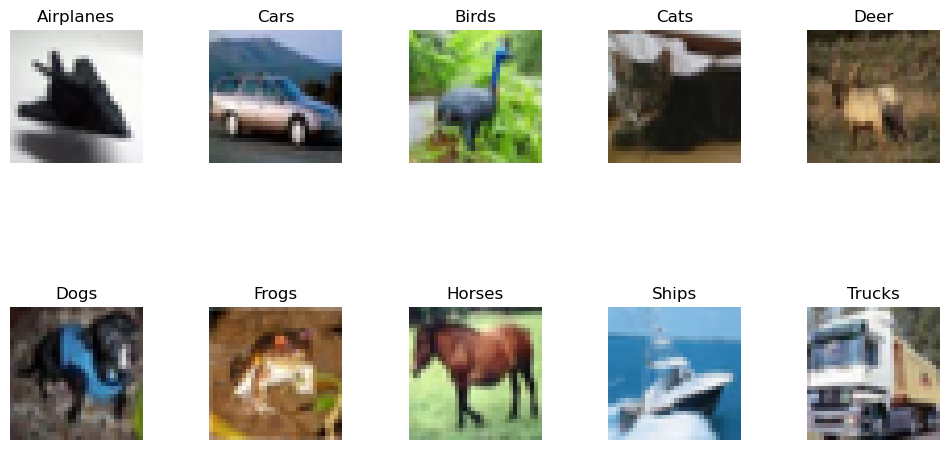

In [3]:
#Displaying sample images from each class
class_names = ['Airplanes', 'Cars', 'Birds', 'Cats', 'Deer', 'Dogs', 'Frogs', 'Horses', 'Ships', 'Trucks']
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    #Selecting a random image from each class
    index = np.where(y_train.reshape(-1) == i)[0][0]
    image = x_train[index]

    axes[i].imshow(image)
    axes[i].set_title(class_names[i])
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [4]:
#One-hot encode
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


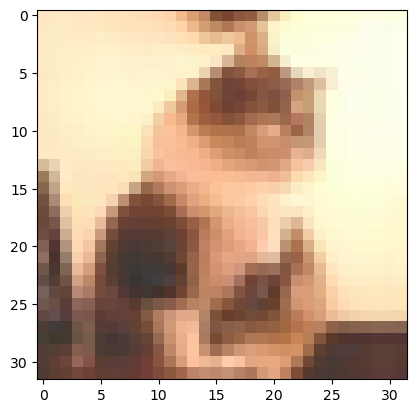

In [5]:
#Take a look at one of the images, it's a pixelated CAT :)
i = 30060
#matplotlib function to show images
plt.imshow(x_train[i])
#show the 'correct label'
#0 1 2 3 4 5 6 7 8
#Airplanes Cars Birds Cats Deer Dogs Frogs Horses Ships Trucks
print(y_train[i])

In [6]:
#Define CNN
def create_basic_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

cnn_model = create_basic_model()

In [7]:
# Train
history = cnn_model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
1250/1250 [==============================] - 18s 13ms/step - loss: 1.5270 - accuracy: 0.4475 - val_loss: 1.3366 - val_accuracy: 0.5187
Epoch 2/10
1250/1250 [==============================] - 17s 14ms/step - loss: 1.1760 - accuracy: 0.5862 - val_loss: 1.1571 - val_accuracy: 0.5971
Epoch 3/10
1250/1250 [==============================] - 17s 14ms/step - loss: 1.0302 - accuracy: 0.6414 - val_loss: 1.0432 - val_accuracy: 0.6440
Epoch 4/10
1250/1250 [==============================] - 17s 13ms/step - loss: 0.9382 - accuracy: 0.6750 - val_loss: 1.0276 - val_accuracy: 0.6483
Epoch 5/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.8730 - accuracy: 0.6958 - val_loss: 0.9812 - val_accuracy: 0.6622
Epoch 6/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.8132 - accuracy: 0.7146 - val_loss: 0.9748 - val_accuracy: 0.6726
Epoch 7/10
1250/1250 [==============================] - 17s 13ms/step - loss: 0.7580 - accuracy: 0.7376 - val_loss: 0.9764 -

In [8]:
#Evaluate
evaluation = cnn_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {evaluation[1]:.2f}')

313/313 [==============================] - 1s 4ms/step - loss: 0.9639 - accuracy: 0.6867
Test Accuracy: 0.69


In [9]:
#Data Augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

#Train model with augmented data
cnn_model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9975 - accuracy: 0.6530
Epoch 2/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9441 - accuracy: 0.6705
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9126 - accuracy: 0.6822
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8919 - accuracy: 0.6868
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8784 - accuracy: 0.6946
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8581 - accuracy: 0.6989
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8426 - accuracy: 0.7066
Epoch 8/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8315 - accuracy: 0.7101
Epoch 9/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8185 - accuracy: 0.7161
Epoch 10/10
1563/1563 [==============================] - 29s 18m

In [10]:
#Evaluate
evaluation = cnn_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {evaluation[1]:.2f}')

313/313 [==============================] - 1s 4ms/step - loss: 0.8094 - accuracy: 0.7299
Test Accuracy: 0.73


In [11]:
#Save
model_path = 'keras_cifar10_trained_model.h5'
cnn_model.save(model_path)

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 4ms/step


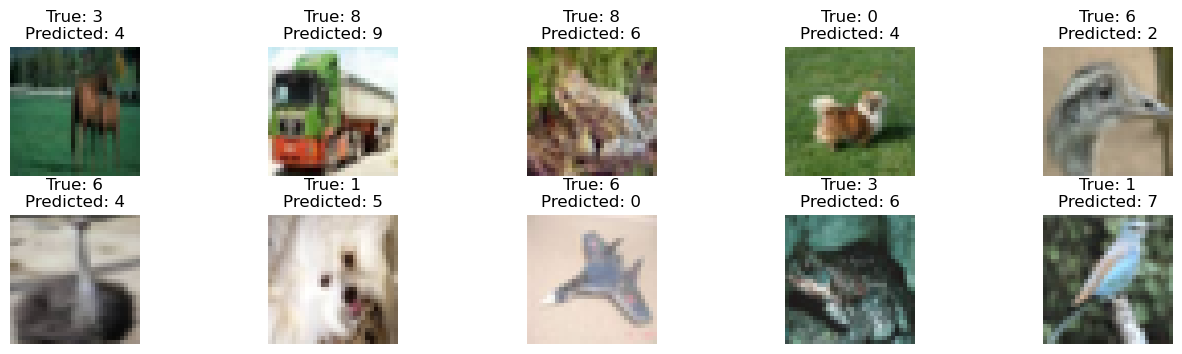

In [12]:
#Predictions
predictions = cnn_model.predict(x_test)

#Convert predictions classes to one hot vectors 
predicted_classes = np.argmax(predictions, axis=1)

#Convert test labels to one hot vectors
y_true = np.argmax(y_test, axis=1)

#Select a few random images and their labels from the test set
num_images = 10
random_indices = np.random.choice(range(len(x_test)), num_images)
sample_images = x_test[random_indices]
sample_labels = y_true[random_indices]
sample_predictions = predicted_classes[random_indices]

#Plot the sample images with true and predicted labels
fig, axes = plt.subplots(2, num_images//2, figsize=(15, 4))
axes = axes.ravel()

for i in range(num_images):
    axes[i].imshow(sample_images[i])
    axes[i].set_title(f'True: {y_true[i]}\nPredicted: {sample_predictions[i]}')
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)

## Model Evaluation and Analysis - First Pass

After training our initial CNN model, it's important to analyze its performance in detail. Beyond just looking at the accuracy, we'll delve into other metrics and visualizations to understand our model's strengths and weaknesses.

In [13]:
#Generate predictions
first_pass_predictions = cnn_model.predict(x_test)
first_pass_predicted_classes = np.argmax(first_pass_predictions, axis=1)

#Classification report
print(classification_report(y_true, first_pass_predicted_classes, target_names=class_names))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

   Airplanes       0.83      0.74      0.78      1000
        Cars       0.76      0.92      0.83      1000
       Birds       0.75      0.51      0.61      1000
        Cats       0.69      0.42      0.52      1000
        Deer       0.72      0.67      0.69      1000
        Dogs       0.64      0.67      0.65      1000
       Frogs       0.69      0.87      0.77      1000
      Horses       0.62      0.88      0.73      1000
       Ships       0.89      0.80      0.84      1000
      Trucks       0.79      0.82      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.72     10000
weighted avg       0.74      0.73      0.72     10000



## Second Pass

In [16]:
from tensorflow.keras.layers import BatchNormalization, Activation

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
def create_advanced_model():
    model = Sequential([
        # Improved layers with Batch Normalization
        Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(64, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(2, 2),
        Dropout(0.4),
        
        Conv2D(128, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(128, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(2, 2),
        Dropout(0.4),
        
        Flatten(),
        Dense(1024),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

advanced_model = create_advanced_model()

In [18]:
#Callbacks for model optimization
checkpoint = ModelCheckpoint('best_advanced_model.h5', verbose=1, save_best_only=True, monitor='val_loss')
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history_advanced = advanced_model.fit(
    x_train, y_train, 
    batch_size=32, 
    epochs=20, 
    validation_split=0.2, 
    shuffle=True, 
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

Epoch 1/20
1250/1250 [==============================] - ETA: 0s - loss: 1.4798 - accuracy: 0.4939
Epoch 1: val_loss improved from inf to 1.09664, saving model to best_advanced_model.h5


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 261s 207ms/step - loss: 1.4798 - accuracy: 0.4939 - val_loss: 1.0966 - val_accuracy: 0.6052 - lr: 0.0010
Epoch 2/20
1250/1250 [==============================] - ETA: 0s - loss: 0.9615 - accuracy: 0.6587
Epoch 2: val_loss improved from 1.09664 to 0.91969, saving model to best_advanced_model.h5
1250/1250 [==============================] - 265s 212ms/step - loss: 0.9615 - accuracy: 0.6587 - val_loss: 0.9197 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 3/20
1250/1250 [==============================] - ETA: 0s - loss: 0.8318 - accuracy: 0.7089
Epoch 3: val_loss improved from 0.91969 to 0.88313, saving model to best_advanced_model.h5
1250/1250 [==============================] - 260s 208ms/step - loss: 0.8318 - accuracy: 0.7089 - val_loss: 0.8831 - val_accuracy: 0.6998 - lr: 0.0010
Epoch 4/20
1250/1250 [==============================] - ETA: 0s - loss: 0.7287 - accuracy: 0.7444
Epoch 4: val_loss improved from 0.88313 to 0.68860, saving model to best_a

313/313 [==============================] - 12s 36ms/step


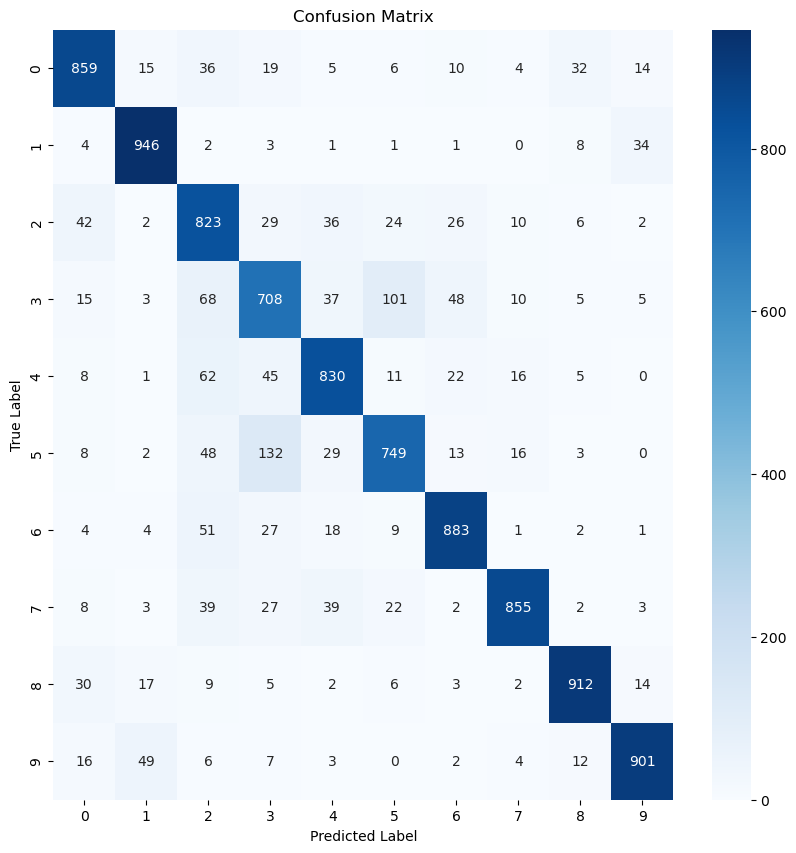

In [19]:
#Pre from advanced model
advanced_predictions = advanced_model.predict(x_test)
advanced_predicted_classes = np.argmax(advanced_predictions, axis=1)

#Confusion Matrix
cm = confusion_matrix(y_true, advanced_predicted_classes)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Model Evaluation and Analysis - Second Pass

With the advanced model, we expect to see improvements in performance. Let's evaluate this model in detail, comparing it to our initial approach, and discuss the impact of the enhancements we've made.


In [20]:
# Generate predictions for advanced model
second_pass_predictions = advanced_model.predict(x_test)
second_pass_predicted_classes = np.argmax(second_pass_predictions, axis=1)

# Classification report for advanced model
print(classification_report(y_true, second_pass_predicted_classes, target_names=class_names))


313/313 [==============================] - 12s 38ms/step
              precision    recall  f1-score   support

   Airplanes       0.86      0.86      0.86      1000
        Cars       0.91      0.95      0.93      1000
       Birds       0.72      0.82      0.77      1000
        Cats       0.71      0.71      0.71      1000
        Deer       0.83      0.83      0.83      1000
        Dogs       0.81      0.75      0.78      1000
       Frogs       0.87      0.88      0.88      1000
      Horses       0.93      0.85      0.89      1000
       Ships       0.92      0.91      0.92      1000
      Trucks       0.93      0.90      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## Conclusion

### Overview of Our Journey
We embarked on an exciting exploration with the CIFAR-10 dataset, a popular benchmark in image classification. Our goal was straightforward yet challenging: to build and refine neural networks that could effectively classify images into their correct categories.

### Phase-wise Breakdown and Insights
- **In the First Pass**, we started with the basics. We built a straightforward CNN model, setting the stage and providing us with a baseline to improve upon. The results were good but hinted that we could do better.
- **The Second Pass** was where things got more interesting. We added layers like Batch Normalization and Dropout and introduced callbacks to optimize our training. This wasn't just about building upon our first model; it was about exploring the depths of what modern neural networks can achieve.

### Key Observations
- **Improved Accuracy**: Our advanced model did show better accuracy, a testament to the power of adding complexity and fine-tuning.
- **Training Dynamics**: Yes, the advanced model took its time training, but it paid off. It was a classic case of 'slow and steady wins the race.'
- **Analyzing Our Models**: The confusion matrices and classification reports were our windows into understanding how well our models were performing. The second model, as expected, had a better grasp of differentiating between the classes.

### Learnings and Challenges
Building these models was a learning curve. We saw firsthand how increasing a model's complexity isn't just about better results but also about the challenges in training and the need for careful tuning.

### What's Next?
- **Hyperparameter Tuning**: There's still room to play around with the model's parameters. Who knows what improvements we might uncover?
- **Exploring Advanced Architectures**: Perhaps trying out architectures like ResNet could open new doors.
- **Transfer Learning**: Leveraging pre-trained models on CIFAR-10? That's an exciting prospect!

### Wrapping Up
This project was more than just about coding and algorithms; it was a deep dive into the practicalities and nuances of machine learning. Working with CIFAR-10 was as rewarding as it was challenging, and it set the foundation for more advanced work in the field of computer vision.
